<a href="https://colab.research.google.com/github/DriftKing-byte/QA-Chatbot/blob/main/NVIDIA_Stock_Market_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series Analysis can be covariate/multivariate or single. Multivariate models are LSTM (deeplearning) or Prophet (Facebook's ML model). The best model for single is Amazon Chronos (Gen AI based model). This purpose of this project is to compare the use of Prophet (usually used by businesses w/ lower accuracy relatively but high interpretability) to LSTM (DL with ability to analyze complex patterns with very good results)

Stock Market Forecase for NVIDIA. Relevant at Walmart, Electric Companies, Goldman Sachs, and Two Sigma, and companies likewise.

The purpose is to predict into the future by a quarter (3 months or 90 days) and find the accuracy of the model.

Data Preprocessing:
1. Convert everything to datetime
2. Usually trading doesn't happen on holidays but MarketWatch includes a quotes for holidays so they're being used.

In [ ]:
## STOCK_US_XNAS_NVDA (3 csvs total) https://www.marketwatch.com/investing/stock/nvda/download-data?startDate=06/02/2022&endDate=06/02/2025

Resource:
1. https://www.youtube.com/watch?v=r0s4slGHwzE (7 Video Playlist by CodeBasics on Preprocessing specifically for TS Data)
2. https://www.youtube.com/watch?v=tepxdcepTbY (Very similar project full walkthrough but main focus on post-preprocessing)

In [ ]:
import pandas as pd
import io

from google.colab import files
##Upload 24/25
uploaded = files.upload()
##Upload 23/24
uploaded_two = files.upload()
##Upload 22/23
uploaded_three = files.upload()

Saving STOCK_US_XNAS_NVDA (24-25).csv to STOCK_US_XNAS_NVDA (24-25).csv


Saving STOCK_US_XNAS_NVDA (23-24).csv to STOCK_US_XNAS_NVDA (23-24).csv


Saving STOCK_US_XNAS_NVDA (22-23).csv to STOCK_US_XNAS_NVDA (22-23).csv


1. Read CSV. Avoid parsing here because we want to easily remove duplicates first. It's hard to remove duplicates once you have parsed dates.

In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['STOCK_US_XNAS_NVDA (24-25).csv'])) ##parse_dates = ['Date'], index_col = 'Date')
data_two = pd.read_csv(io.BytesIO(uploaded_two['STOCK_US_XNAS_NVDA (23-24).csv'])) ##parse_dates = ['Date'], index_col = 'Date')
data_three = pd.read_csv(io.BytesIO(uploaded_three['STOCK_US_XNAS_NVDA (22-23).csv'])) ##parse_dates = ['Date'], index_col = 'Date')

In [ ]:
df = pd.concat([data, data_two, data_three], axis=0)
df.head(752)

,Date,Open,High,Low,Close,Volume
0,06/02/2025,135.49,138.12,135.40,137.38,"197,663,109"
1,05/30/2025,138.72,139.62,132.92,135.13,"333,170,906"
2,05/29/2025,142.25,143.49,137.91,139.19,"370,615,188"
3,05/28/2025,136.03,137.25,134.79,134.81,"304,021,094"
4,05/27/2025,134.15,135.66,133.31,135.50,"192,953,594"
...,...,...,...,...,...,...
246,06/09/2022,18.48,18.93,18.04,18.05,"395,573,786"
247,06/08/2022,18.80,19.18,18.54,18.65,"363,252,456"
248,06/07/2022,18.47,19.00,18.19,18.93,"388,914,056"
249,06/06/2022,19.14,19.34,18.56,18.79,"422,406,206"


2. Find duplicates and drop.

In [ ]:
duplicates = df[df.duplicated()]
print(duplicates)

         Date  Open  High    Low  Close       Volume
0  06/02/2023  40.1  40.5  39.06  39.33  482,731,205


In [ ]:
df = df.drop_duplicates()
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []


3. Separate all time into its own column and keep all features in another.

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,06/02/2025,135.49,138.12,135.40,137.38,"197,663,109"
1,05/30/2025,138.72,139.62,132.92,135.13,"333,170,906"
2,05/29/2025,142.25,143.49,137.91,139.19,"370,615,188"
3,05/28/2025,136.03,137.25,134.79,134.81,"304,021,094"
4,05/27/2025,134.15,135.66,133.31,135.50,"192,953,594"


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume
247,06/08/2022,18.80,19.18,18.54,18.65,"363,252,456"
248,06/07/2022,18.47,19.00,18.19,18.93,"388,914,056"
249,06/06/2022,19.14,19.34,18.56,18.79,"422,406,206"
250,06/03/2022,19.08,19.33,18.52,18.72,"598,778,664"
251,06/02/2022,18.29,19.62,18.20,19.59,"648,655,774"


In [ ]:
df1 = df.reset_index()['Close']

In [ ]:
df1

,Close
0,137.38
1,135.13
2,139.19
3,134.81
4,135.50
...,...
747,18.65
748,18.93
749,18.79
750,18.72


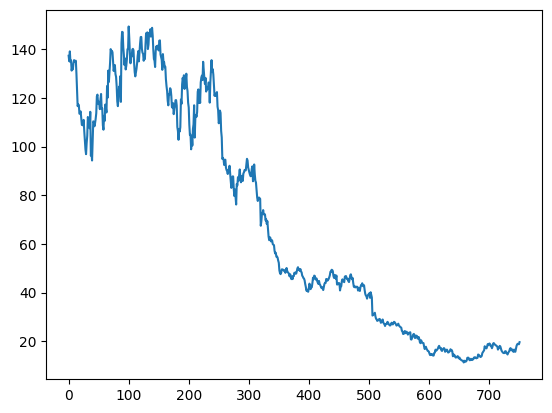

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.91280753]
 [0.89652677]
 [0.92590449]
 [0.89421129]
 [0.89920405]
 [0.86874096]
 [0.87988423]
 [0.87243126]
 [0.89109986]
 [0.89971056]
 [0.89848046]
 [0.89435601]
 [0.89804631]
 [0.85890014]
 [0.80875543]
 [0.76280753]
 [0.76801737]
 [0.76577424]
 [0.74030391]
 [0.74232996]
 [0.74725036]
 [0.72633864]
 [0.7068741 ]
 [0.70759768]
 [0.70549928]
 [0.72199711]
 [0.68885673]
 [0.66193922]
 [0.63429812]
 [0.61997106]
 [0.65311143]
 [0.6748191 ]
 [0.73060781]
 [0.71982634]
 [0.72141823]
 [0.69710564]
 [0.74602026]
 [0.61555716]
 [0.62525326]
 [0.60115774]
 [0.65535456]
 [0.71772793]
 [0.71577424]
 [0.70296671]
 [0.71230101]
 [0.72503618]
 [0.7418958 ]
 [0.79204052]
 [0.79725036]
 [0.77040521]
 [0.776411  ]
 [0.76910275]
 [0.75397974]
 [0.78364689]
 [0.79913169]
 [0.75506512]
 [0.75622287]
 [0.70571635]
 [0.69283647]
 [0.7341534 ]
 [0.71881331]
 [0.76751085]
 [0.75803184]
 [0.74406657]
 [0.82264834]
 [0.78813314]
 [0.8686686 ]
 [0.83502171]
 [0.86143271]
 [0.89146165]
 [0.93256151]
 [0.92

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(488, 264)

In [ ]:
train_data

array([[0.91280753],
       [0.89652677],
       [0.92590449],
       [0.89421129],
       [0.89920405],
       [0.86874096],
       [0.87988423],
       [0.87243126],
       [0.89109986],
       [0.89971056],
       [0.89848046],
       [0.89435601],
       [0.89804631],
       [0.85890014],
       [0.80875543],
       [0.76280753],
       [0.76801737],
       [0.76577424],
       [0.74030391],
       [0.74232996],
       [0.74725036],
       [0.72633864],
       [0.7068741 ],
       [0.70759768],
       [0.70549928],
       [0.72199711],
       [0.68885673],
       [0.66193922],
       [0.63429812],
       [0.61997106],
       [0.65311143],
       [0.6748191 ],
       [0.73060781],
       [0.71982634],
       [0.72141823],
       [0.69710564],
       [0.74602026],
       [0.61555716],
       [0.62525326],
       [0.60115774],
       [0.65535456],
       [0.71772793],
       [0.71577424],
       [0.70296671],
       [0.71230101],
       [0.72503618],
       [0.7418958 ],
       [0.792

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(387, 100)
(387,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(163, 100)
(163,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step - loss: 0.2687 - val_loss: 0.0456
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step - loss: 0.0465 - val_loss: 0.0105
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - loss: 0.0276 - val_loss: 0.0129
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - loss: 0.0102 - val_loss: 0.0124
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - loss: 0.0082 - val_loss: 0.0039
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - loss: 0.0059 - val_loss: 0.0021
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - loss: 0.0042 - val_loss: 3.6930e-04
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 302ms/step - loss: 0.0041 - val_loss: 2.2031e-04
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - loss: 0.0039 - val_loss: 2.0721e-04
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - loss: 0.0040 - val_loss: 1.8326e-04
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - loss: 0.0035 - val_loss: 1.7369e-04
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 17

In [ ]:
import tensorflow as tf

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

x_input=test_data[341:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)

End

In [ ]:
train_dates = pd.to_datetime(df['Date'])

In [ ]:
cols = list(df)[1:6]
print(cols)

In [ ]:
#Clear the string values (commas) by replacing with spaces
df["Volume"] = df["Volume"].astype(str).str.replace(",", "").astype(float)
print(df['Volume'])

In [ ]:
df_for_training = df[cols].astype(float)
df_for_training.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [ ]:
trainX = []
trainY = []

In [ ]:
#Sliding Window Feed.
n_future = 1 # of days to predict the future
n_past = 14 # of past days to use to predict the future

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
  trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
  trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [ ]:
import numpy as np

trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

In [ ]:
#Define the autoencoder model
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model = Sequential()
model.add(LSTM(64, activation = 'relu', input_shape = (trainX.shape[1], trainX.shape[2]), return_sequences = True))
model.add(LSTM(32, activation = 'relu', return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

In [ ]:
history = model.fit(trainX, trainY, epochs = 10, batch_size = 16, validation_split = 0.1, verbose = 1)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3958 - val_loss: 0.0018
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0671 - val_loss: 0.0024
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0596 - val_loss: 0.0061
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0536 - val_loss: 0.0097
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0454 - val_loss: 0.0024
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0374 - val_loss: 0.0138
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0480 - val_loss: 0.0016
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0387 - val_loss: 0.0027
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0393 - val_loss: 0.0026
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0379 - val_loss: 0.0020


In [ ]:
n_future = 90
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods = n_future, freq = '1d').tolist()
forecast = model.predict(trainX[-n_future:])

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step


In [ ]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis = 1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

In [ ]:
forecast_dates = []
for time_i in forecast_period_dates:
  forecast_dates.append(time_i.date())

In [ ]:
df_forecast = pd.DataFrame({'Date': np.array(forecast_dates), 'Open': y_pred_future})
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

In [ ]:
original = df[['Date', 'Open']]
original['Date'] = pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2022-06-02']

<ipython-input-26-df0da0f00657>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date'] = pd.to_datetime(original['Date'])


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))

sns.lineplot(x='Date', y='Open', data=original, label='Original')
sns.lineplot(x='Date', y='Open', data=df_forecast, label='Forecast')

plt.title("Original vs Forecasted Prices")
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.legend()
plt.show()